In [51]:
%load_ext autoreload
%autoreload 2

import sys
if sys.path[-1] != "..": sys.path.append("..")

from Source.qBN.qBNMC import qBayesNet
from Source.qBN.qBNInference import qInference
from Source.qBN.qBNRT import qRuntime


import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeProviderForBackendV2, FakeWashingtonV2
device_backend = FakeWashingtonV2()


In [125]:
bn=gum.fastBN("c->r->w<-s<-c")
bn

(pyAgrum.BayesNet<double>@0x65240ddee580) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}

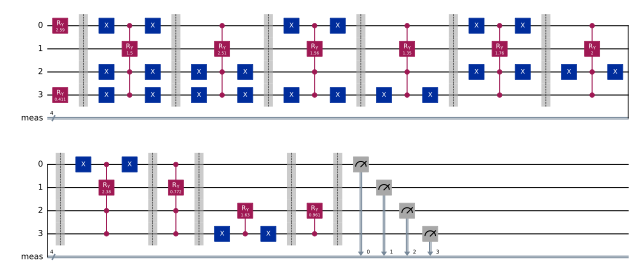

In [101]:
target_nodes_bn1 = None
qbn1 = qBayesNet(bn1, target_nodes_bn1)
qc1 = qbn1.buildCircuit(add_measure=True)
qc1.draw(output="mpl", scale=0.5)

In [108]:
ev = {3:0, 1:1}

In [109]:
qinf = qInference(qbn1)
qinf.setEvidence(ev)
qinf.setMaxIter(1000)
qinf.makeInference()

In [119]:
qinf.posterior(2)

(pyAgrum.Potential<double>@0x65240bd126d0) 
  C                |
0        |1        |
---------|---------|
 0.4920  | 0.5080  |

In [120]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

ie=gum.LazyPropagation(bn1)
ie.setEvidence(ev)
#ie.makeInference()
ie.posterior(2)

(pyAgrum.Potential<double>@0x65240d3371b0) 
  C                |
0        |1        |
---------|---------|
 0.6616  | 0.3384  |

In [89]:
qrt = qRuntime(qinf)

In [90]:
qrt.getGateExecutionTime()

18841
0.00563228
18858
0.00563294


In [92]:
qrt.G_time

0.00563294

In [93]:
qrt.qinf.log

{'A': 1196, 'G': 1880}

0 [1.0, 0.0, 0.0]
1 [0.43649331134249897, 0.3582809432277832, 0.2052257454297179]
2 [0.0, 1.0, 0.0]
18841
0.00563228
16012
0.00508836


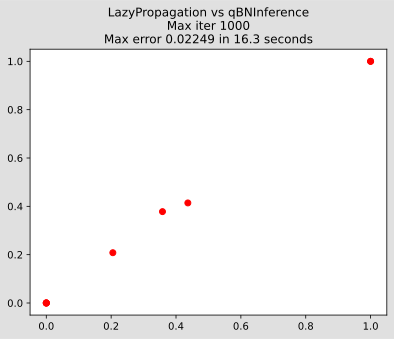

In [87]:
qrt.compareInference()

In [187]:
rt.totalRuntime(log, ev)

17247
0.005243060000000001
17623
0.00560558


16.06855552

In [29]:
qcd.depth()

173

In [9]:
from qiskit.converters import circuit_to_dag

In [10]:
dag_circuit = circuit_to_dag(qcd)
#dag_circuit.draw()

In [11]:
dag_circuit.count_ops_longest_path()

{'rz': 185, 'sx': 121, 'barrier': 5, 'x': 3, 'ecr': 96, 'measure': 1}

In [12]:
FakeProviderForBackendV2.backends()

TypeError: FakeProviderForBackendV2.backends() missing 1 required positional argument: 'self'

In [43]:
bn2 = gum.fastBN("A->B<-C", 3)
bn2

(pyAgrum.BayesNet<double>@0x5ee124e39b20) BN{nodes: 3, arcs: 2, domainSize: 27, dim: 22, mem: 264o}

In [44]:
target_nodes_bn2 = None
qbn2 = qBayesNet(bn2, target_nodes_bn2)
qc2 = qbn2.buildCircuit(add_measure=True)

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='2871fe563fabd1df569acfc900f554cd6c9874c98f9a179d17143ce66570130cde317ac0c002524befd1af86259cb6cdf67e88512c054f44a94e3e948557e249'
)

default_backend = service.get_backend("ibm_brisbane")

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='2871fe563fabd1df569acfc900f554cd6c9874c98f9a179d17143ce66570130cde317ac0c002524befd1af86259cb6cdf67e88512c054f44a94e3e948557e249')


In [9]:
type(default_backend)

qiskit_ibm_runtime.ibm_backend.IBMBackend

In [26]:


import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
bn=bn1

ie=gum.LazyPropagation(bn)
ie.makeInference()



In [27]:
bn1.cpt(1)

(pyAgrum.Potential<double>@0x5ee12421d280) 
             ||  B                          |
A     |C     ||0        |1        |2        |
------|------||---------|---------|---------|
0     |0     || 0.2733  | 0.4813  | 0.2454  |
1     |0     || 0.7020  | 0.0406  | 0.2574  |
2     |0     || 0.2863  | 0.4952  | 0.2184  |
0     |1     || 0.5358  | 0.4537  | 0.0105  |
1     |1     || 0.4841  | 0.3228  | 0.1931  |
2     |1     || 0.0564  | 0.1987  | 0.7449  |
0     |2     || 0.2742  | 0.6125  | 0.1133  |
1     |2     || 0.3644  | 0.3266  | 0.3090  |
2     |2     || 0.1461  | 0.7337  | 0.1202  |

In [42]:
#ie.addEvidence(0,1)
#ie.addEvidence(2,1)

ie.

True

In [34]:
ie.posterior(0)

(pyAgrum.Potential<double>@0x5ee124d12fa0) 
  A                          |
0        |1        |2        |
---------|---------|---------|
 0.0000  | 1.0000  | 0.0000  |

In [117]:
from qiskit_ibm_runtime.fake_provider import FakeOsaka
from qiskit_aer import AerSimulator



In [114]:
tqc = transpile(qc1, backend)

In [120]:
rt.samplePrepEstimation()

150


4.352e-05

In [121]:
rt.groverIterateEstimation({0:1, 0:1})

168


4.492e-05

In [29]:
from qiskit.quantum_info import Operator

op = Operator(qbn1.buildCircuit(False))

In [43]:
FakeOsaka().target["sx"].items()

dict_items([((0,), InstructionProperties(duration=6e-08, error=0.00017696059550875452, calibration=PulseQobj)), ((1,), InstructionProperties(duration=6e-08, error=0.00012472617025597, calibration=PulseQobj)), ((2,), InstructionProperties(duration=6e-08, error=0.00038387272674955154, calibration=PulseQobj)), ((3,), InstructionProperties(duration=6e-08, error=0.00020198616387595556, calibration=PulseQobj)), ((4,), InstructionProperties(duration=6e-08, error=0.00019620049007449756, calibration=PulseQobj)), ((5,), InstructionProperties(duration=6e-08, error=0.00017262407268701935, calibration=PulseQobj)), ((6,), InstructionProperties(duration=6e-08, error=0.00011945834664989482, calibration=PulseQobj)), ((7,), InstructionProperties(duration=6e-08, error=0.0002978821216994441, calibration=PulseQobj)), ((8,), InstructionProperties(duration=6e-08, error=0.0006036568718894249, calibration=PulseQobj)), ((9,), InstructionProperties(duration=6e-08, error=0.00042151833221229295, calibration=PulseQ

In [49]:
from qiskit import transpile, QuantumCircuit
from qiskit.transpiler import InstructionDurations

backend = device_backend
# Define your quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Get durations for the backend
durations = InstructionDurations.from_backend(backend)

# Transpile the circuit for the specific backend
transpiled_circuit = transpile(qc, backend=backend)

# Calculate the total duration
total_duration = 0
for instr in transpiled_circuit:
    if instr.name in durations:
        qubits = [q.index for q in instr.qubits]
        duration = durations.get(instr.name, qubits)
        total_duration += duration

print(f"Total duration of the quantum circuit: {total_duration} seconds")


AttributeError: 'FakeWashingtonV2' object has no attribute 'properties'

In [57]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>]

In [61]:
backend.target.items()

dict_items([('id', {(0,): InstructionProperties(duration=6e-08, error=0.00017342614010154017, calibration=Schedule id), (1,): InstructionProperties(duration=6e-08, error=0.0002141463040921912, calibration=Schedule id), (2,): InstructionProperties(duration=6e-08, error=0.0006461663408355561, calibration=Schedule id), (3,): InstructionProperties(duration=6e-08, error=0.0001995778776286808, calibration=Schedule id), (4,): InstructionProperties(duration=6e-08, error=0.004302893136174268, calibration=Schedule id), (5,): InstructionProperties(duration=6e-08, error=0.00011059625948395091, calibration=Schedule id), (6,): InstructionProperties(duration=6e-08, error=0.0003478712428965468, calibration=Schedule id), (7,): InstructionProperties(duration=6e-08, error=0.00033524897892620725, calibration=Schedule id), (8,): InstructionProperties(duration=6e-08, error=0.00014900849375709408, calibration=Schedule id), (9,): InstructionProperties(duration=6e-08, error=0.00015401408401775852, calibration=